In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [14]:
### define functions 
def tropics(nu, Cd, Ct, B, phit):
    dndt = nu*Cd - nu*Ct - B - phit
    dcdt = dndt/Vt
    return dcdt

def poles(nu, Ct, Cp, phip):
    dndt = nu*Ct - nu*Cp - phip
    dcdt = dndt/Vp
    return dcdt

def depths(nu, Cp, Cd):
    dndt = nu*Cp - nu*Cd
    dcdt = dndt/Vp
    return dcdt

def bio(C):
    kbio = 1.0 #m^-3 yr^-1
    b = kbio*C # mol yr^-1 
    return b

def phi(C, T):
    S = solubility(T) #mol/kg/atm
    Patm = 280.0e-6 #atm
    rho = 1000.0 #kg/m^3
    Catm = S*Patm*rho #mol/m^3
    u = 10.0 # m/s
    Sc = schmidtCO2(T) # dimensionless
    k = wanninkhof92(u, Sc) #cm hr^-1
    p = k*(C-Catm) #cm hr^-1 mol m^-3
    convert = 1e-2*24.0*365.0 #cm/m * hr/day * days/year
    return p*convert #mol m^2 yr^-1
    
### define wanninkhof (1992) formulation
def wanninkhof92(u, Sc):
    # u is in m s^-1
    # Sc is dimensionless
    # k is in cm hr^-1
    k = 0.31*u**2.0*(Sc/600.0)**0.5
    return k

### define schmidt number
def schmidtCO2(T):
    # T must be in celsius
    # coefs are for CO2
    A = 2073.1
    B = 125.62
    C = 3.6276
    D = 0.043219
    sc = A- B*T + C*T**2 -D*T**3
    return sc

def solubility(TEMP):
    tk = TEMP + 273.15 # convert to Kelvin
    tk100 = tk * 1e-2
    tk1002 = tk100 * tk100
    s = 35.0 # psu
    ff = np.exp(-162.8301 + (218.2968/tk100) + 90.9241*np.log(tk100) - 1.47696*tk1002 + s*(0.025695 - 0.025225*tk100 + 0.0049867*tk1002))
    return ff # units are mol/kg/atm

In [110]:
N = 10000
times = np.linspace(0, 1.0, N) # years
# inital conditions
Ct = np.zeros(N)
Cp = np.zeros(N)
Cd = np.zeros(N)
Ct[0], Cp[0], Cd[0] = 300.0, 300.0, 300.0
Tt = 25.0 #celsius
Tp = 0.0
nu = 0.01 #m/s
# volumes
Vt = 1.0
Vp = 1.0
Vd = 1.0
dt = np.diff(times)[0]

Ctodeint(tropics, (nu, Cd[ii], Ct[ii], Bt, phit))
phit = phi(Ct[ii], Tt)
Bt = bio(Ct[ii])
Ct[ii+1] = Ct[ii] + dt*tropics(nu, Cd[ii], Ct[ii], Bt, phit)

# poles
phip = phi(Cp[ii], Tp)
Cp[ii+1] = Cp[ii] + dt*poles(nu, Ct[ii], Cp[ii], phip)

# depths
Cd[ii+1] = Cd[ii] + dt*depths(nu, Cp[ii], Cd[ii])

(-1000, 1000)

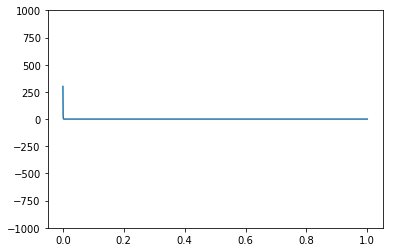

In [111]:
plt.plot(times,Ct)
plt.ylim(-1000,1000)